<a href="https://www.kaggle.com/taha07/data-analysis-nyc-s-leading-causes-of-death?scriptVersionId=88916841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---

<h1 style="text-align: center;font-size: 40px;">NYC's Leading Causes of Death: Data Analysis</h1>

---

<center><img src="https://images.pexels.com/photos/450597/pexels-photo-450597.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500
"width="500" height="600"></center>

---

In [1]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 288 kB/s            


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle
from sklearn.manifold import TSNE


In [3]:
df = pd.read_csv("../input/nyc-leading-causes-of-deathe/New_York_City_Leading_Causes_of_Death.csv")
df.head().style.background_gradient(cmap = 'Reds')

,Year,Ethnicity,Sex,Cause of Death,Count,Percent
0,2010,NON-HISPANIC BLACK,MALE,HUMAN IMMUNODEFICIENCY VIRUS DISEASE,297,5
1,2010,NON-HISPANIC BLACK,MALE,INFLUENZA AND PNEUMONIA,201,3
2,2010,NON-HISPANIC BLACK,MALE,INTENTIONAL SELF-HARM (SUICIDE),64,1
3,2010,NON-HISPANIC BLACK,MALE,MALIGNANT NEOPLASMS,1540,23
4,2010,NON-HISPANIC BLACK,MALE,MENTAL DISORDERS DUE TO USE OF ALCOHOL,50,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3840.0,2009.009375,1.421348,2007.0,2008.0,2009.0,2010.0,2011.0
Count,3840.0,248.215625,722.706156,5.0,20.0,54.0,156.0,7050.0
Percent,3840.0,3.712500,8.124753,0.0,0.0,1.0,3.0,49.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            3840 non-null   int64 
 1   Ethnicity       3840 non-null   object
 2   Sex             3840 non-null   object
 3   Cause of Death  3840 non-null   object
 4   Count           3840 non-null   int64 
 5   Percent         3840 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 180.1+ KB


In [6]:
df["Ethnicity"].value_counts()

NON-HISPANIC BLACK          1016
NON-HISPANIC WHITE          1012
HISPANIC                    1008
ASIAN & PACIFIC ISLANDER     804
Name: Ethnicity, dtype: int64

In [7]:
list(df.groupby("Cause of Death")['Count'].sum().nlargest(10).index)

['DISEASES OF HEART',
 'MALIGNANT NEOPLASMS',
 'INFLUENZA AND PNEUMONIA',
 'DIABETES MELLITUS',
 'CHRONIC LOWER RESPIRATORY DISEASES',
 'CEREBROVASCULAR DISEASE',
 'ACCIDENTS EXCEPT DRUG POISONING',
 'HUMAN IMMUNODEFICIENCY VIRUS DISEASE',
 'ESSENTIAL HYPERTENSION AND RENAL DISEASES',
 'PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING']

> <h4>Top 10 causes of death:</h4>

In [8]:
dict(df.groupby("Cause of Death")['Count'].sum().nlargest(10)/df['Count'].sum()*100)

{'DISEASES OF HEART': 40.42394255666486,
 'MALIGNANT NEOPLASMS': 27.5285684909374,
 'INFLUENZA AND PNEUMONIA': 4.88024944709531,
 'DIABETES MELLITUS': 3.464309844850957,
 'CHRONIC LOWER RESPIRATORY DISEASES': 3.3409292156097483,
 'CEREBROVASCULAR DISEASE': 3.2620327588160496,
 'ACCIDENTS EXCEPT DRUG POISONING': 2.073130300855691,
 'HUMAN IMMUNODEFICIENCY VIRUS DISEASE': 1.9438744035553766,
 'ESSENTIAL HYPERTENSION AND RENAL DISEASES': 1.9207929933231775,
 'PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING': 1.523792737329355}

In [9]:
df['Year'].unique()

array([2010, 2011, 2007, 2008, 2009])

- This dataset consists of 5 years of data 2007 to 2011

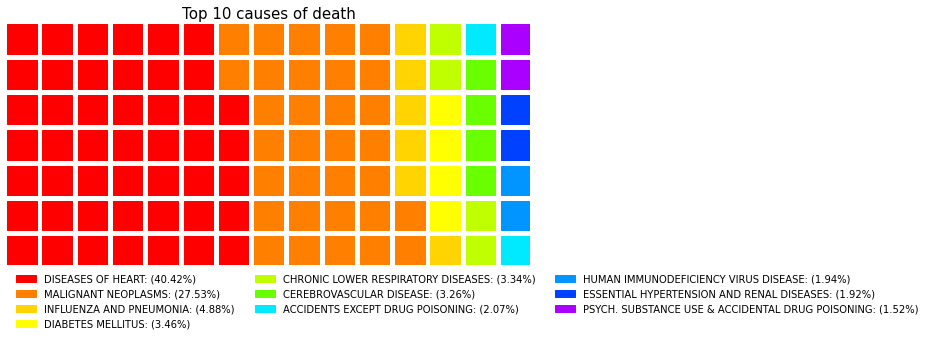

In [10]:
import warnings
warnings.filterwarnings('ignore')
data = dict(df.groupby("Cause of Death")['Count'].sum().nlargest(10)/df['Count'].sum()*100)

causes = list(df.groupby("Cause of Death")['Count'].sum().nlargest(10).index)
fig = plt.figure(rows = 7, columns = 15,
          FigureClass = Waffle, values = data,
          title = {'label':'Top 10 causes of death', 'loc': 'center', 'fontsize':15},
          colors=("#FF0000", "#FF7F00", "#FFD400","#FFFF00","#BFFF00","#6AFF00",
                  "#00EAFF","#0095FF","#0040FF","#AA00FF"),
           labels = [f"{k}: ({v:.2f}%)" for k,v in data.items()],
           legend = {'loc': 'lower left', 'bbox_to_anchor': (0,-0.3), 'ncol': 3, 'framealpha': 0},
           figsize=(12,9)
          )
fig.show()

>**Observation:**
- So, heart disease is one of the major cause of death in New York with a percentage of 40.42%
- Malignant neoplasms is the second major cause of death with a percentage of 27.53%. Malignant neoplasms are cancerous tumors. They develop when cells grow and divide more than they should. Malignant neoplasms can spread to nearby tissues and to distant parts of your body.

In [11]:
data = df.groupby("Cause of Death")['Count'].sum().nlargest(10)[::-1]
data = pd.DataFrame(data).reset_index()

fig = px.bar(data,  x = data['Count'],y = data['Cause of Death'],orientation = 'h',
            color_discrete_sequence = px.colors.sequential.RdBu,title ='Top 10 causes of Death')

fig.show()

> <h4>Percentage of Death among ethnicity:</h4>

In [12]:
data = df.groupby(['Ethnicity'])['Count'].sum().nlargest()/df['Count'].sum()
data

Ethnicity
NON-HISPANIC WHITE          0.507686
NON-HISPANIC BLACK          0.262192
HISPANIC                    0.172112
ASIAN & PACIFIC ISLANDER    0.058010
Name: Count, dtype: float64

In [13]:
import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = 'plotly_dark'
data = df.groupby(['Ethnicity'])['Count'].sum().nlargest()/df['Count'].sum()
fig = go.Figure(data =[go.Pie(values=list(data.values), labels=list(data.index),
                              pull=[0.01, 0.01, 0.01, 0.2],title = "Percentage of Death among ethnicity",
                             titleposition = 'top center')])
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.show()

> **Observation:**
- Percentage of death among NON-HISPANIC WHITE is 50.8%, which is higher than the other ethnicity, it's because may be in NYC, the number of NON-HISPANIC WHITE people is higher than other ethnicity.
- According to google, White Americans make up 44.6% of New York City's population. According to the survey, there were 3,704,243 White Americans residing in New York City. White Americans of non-Hispanic origin make up 35.1% of the city's population.

> <h4>Since NON-HISPANIC WHITE ethnicity has the highest percentage of death. Let's see is there any biasness between sex in case of death:</h4>

In [14]:
data = df.groupby(['Ethnicity','Sex'])['Count'].sum()[::-1].reset_index()
data[data['Ethnicity'] == 'NON-HISPANIC WHITE']

,Ethnicity,Sex,Count
0,NON-HISPANIC WHITE,MALE,231936
1,NON-HISPANIC WHITE,FEMALE,251964


In [15]:
pio.templates.default = 'plotly_dark'
data = df.groupby(['Ethnicity','Sex'])['Count'].sum()[::-1].reset_index()
data = data[data['Ethnicity'] == 'NON-HISPANIC WHITE']
fig = go.Figure(data =[go.Pie(values=data['Count'], labels=data['Sex'],
                              pull=[0.01, 0.02],title = "Percentage of Death among gender of NON-HISPANIC WHITE ethnicity",
                             titleposition = 'top center')])
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.show()

> According to <a href="https://www.simplyinsurance.com/average-us-life-expectancy-statistics/#section-11">google</a> average life expectancy of a man in usa is  76.1 year and for a woman is 81.1 year. So percentage of death among men supposed to be greater than female, but here's comes another factor according to <a href="https://nycopendata.tumblr.com/post/16176068515/nycedc-ratio-of-single-men-to-single-women-in#:~:text=New%20York%20City's%20population%20is,ages%20of%2020%20and%2034.">nyc open data</a> New York City's population is 53% female and 47% male. So the number of female is higher than male in nyc, that's why here we are getting a higher proportion in female.

In [16]:
data = df.groupby("Cause of Death")['Count'].sum().nlargest(10)[::-1]
pd.DataFrame(data).reset_index()

,Cause of Death,Count
0,PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING,14524
1,ESSENTIAL HYPERTENSION AND RENAL DISEASES,18308
2,HUMAN IMMUNODEFICIENCY VIRUS DISEASE,18528
3,ACCIDENTS EXCEPT DRUG POISONING,19760
4,CEREBROVASCULAR DISEASE,31092
5,CHRONIC LOWER RESPIRATORY DISEASES,31844
6,DIABETES MELLITUS,33020
7,INFLUENZA AND PNEUMONIA,46516
8,MALIGNANT NEOPLASMS,262388
9,DISEASES OF HEART,385300


> <h4>Trending of Causes of Death throughout the year:</h4>

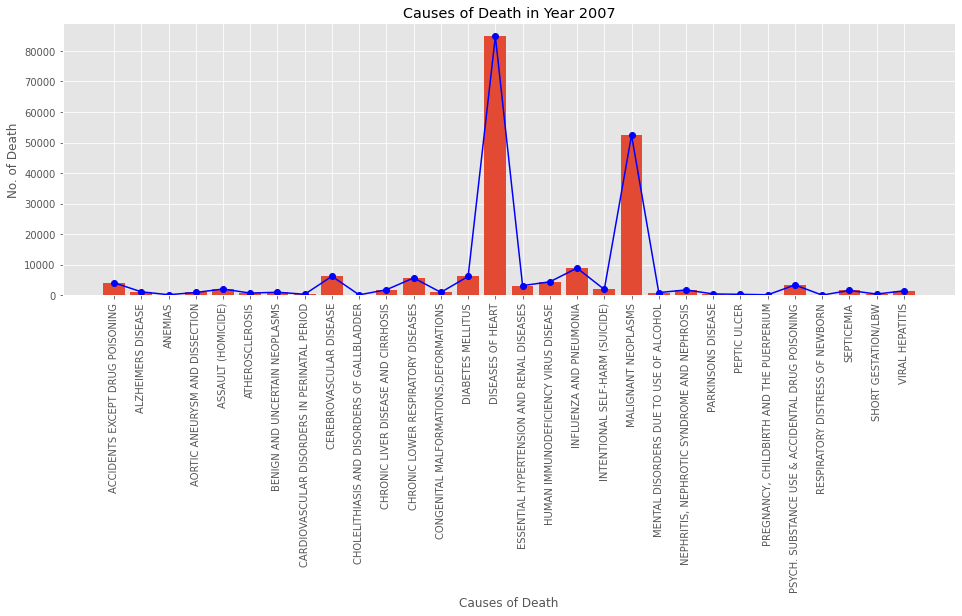

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data = data[data['Year'] == 2007]#.reset_index()
plt.bar(x = data["Cause of Death"],height=data["Count"],)
plt.plot(data["Cause of Death"],data["Count"],"bo-")
plt.title("Causes of Death in Year 2007")
plt.xlabel("Causes of Death")
plt.ylabel("No. of Death")
plt.xticks(rotation = 90)
plt.show()

In [18]:
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data[data['Year'] == 2008].nlargest(5,'Count')

,Year,Cause of Death,Count
44,2008,DISEASES OF HEART,83672
49,2008,MALIGNANT NEOPLASMS,51588
47,2008,INFLUENZA AND PNEUMONIA,9068
43,2008,DIABETES MELLITUS,6480
41,2008,CHRONIC LOWER RESPIRATORY DISEASES,6356


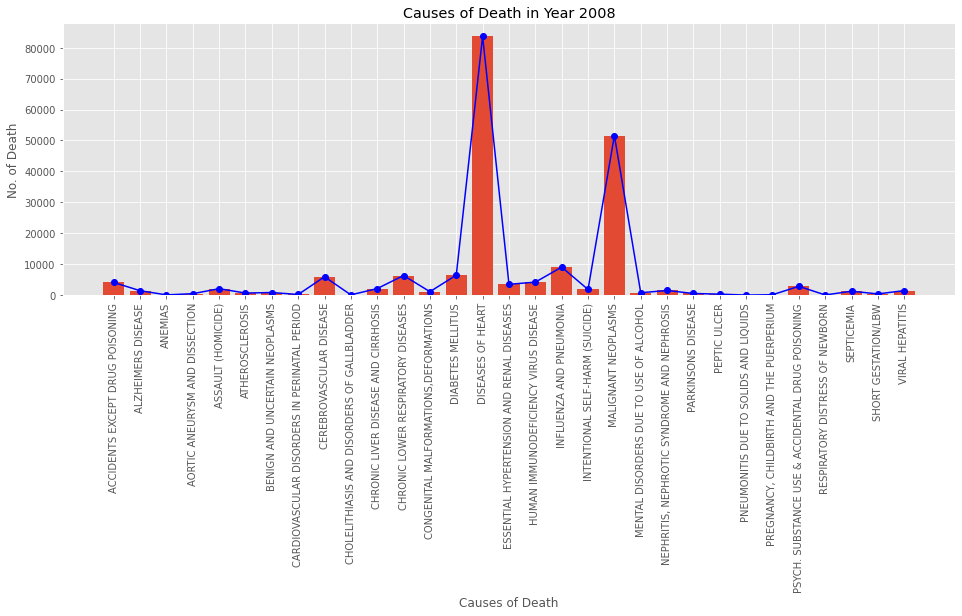

In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data = data[data['Year'] == 2008]#.reset_index()
plt.bar(x = data["Cause of Death"],height=data["Count"],)
plt.plot(data["Cause of Death"],data["Count"],"bo-")
plt.title("Causes of Death in Year 2008")
plt.xlabel("Causes of Death")
plt.ylabel("No. of Death")
plt.xticks(rotation = 90)
plt.show()

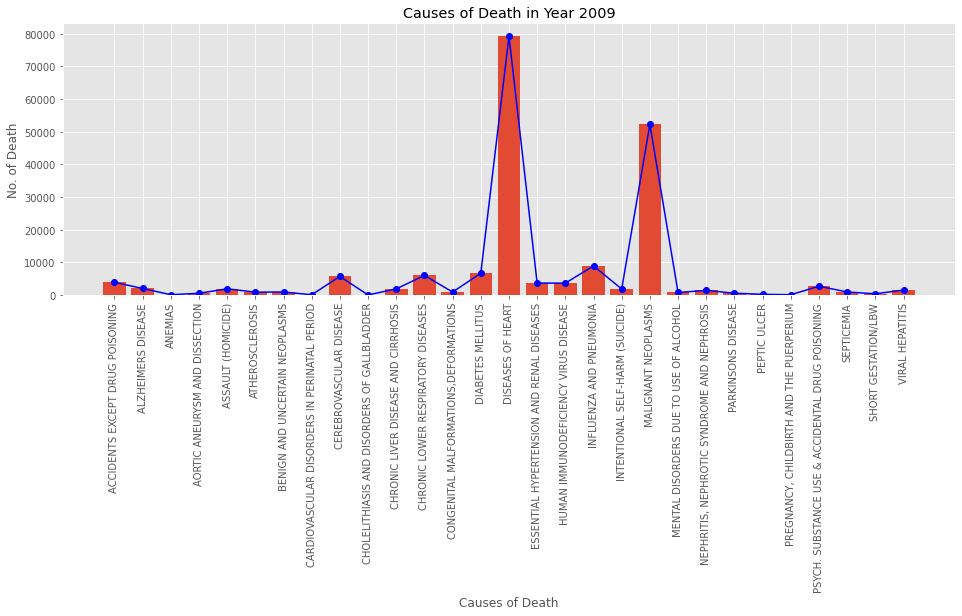

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data = data[data['Year'] == 2009]#.reset_index()
plt.bar(x = data["Cause of Death"],height=data["Count"],)
plt.plot(data["Cause of Death"],data["Count"],"bo-")
plt.title("Causes of Death in Year 2009")
plt.xlabel("Causes of Death")
plt.ylabel("No. of Death")
plt.xticks(rotation = 90)
plt.show()

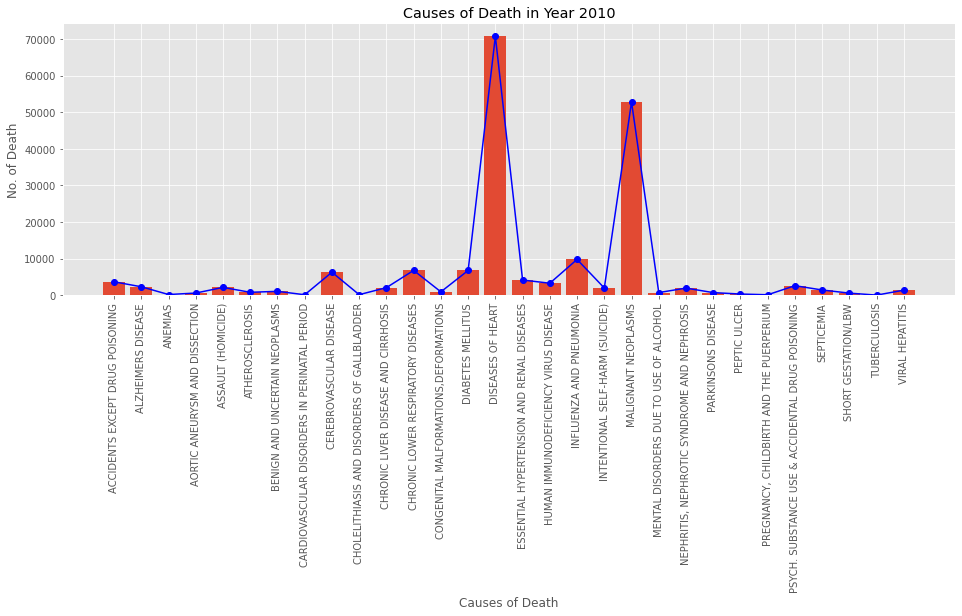

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data = data[data['Year'] == 2010]#.reset_index()
plt.bar(x = data["Cause of Death"],height=data["Count"],)
plt.plot(data["Cause of Death"],data["Count"],"bo-")
plt.title("Causes of Death in Year 2010")
plt.xlabel("Causes of Death")
plt.ylabel("No. of Death")
plt.xticks(rotation = 90)
plt.show()

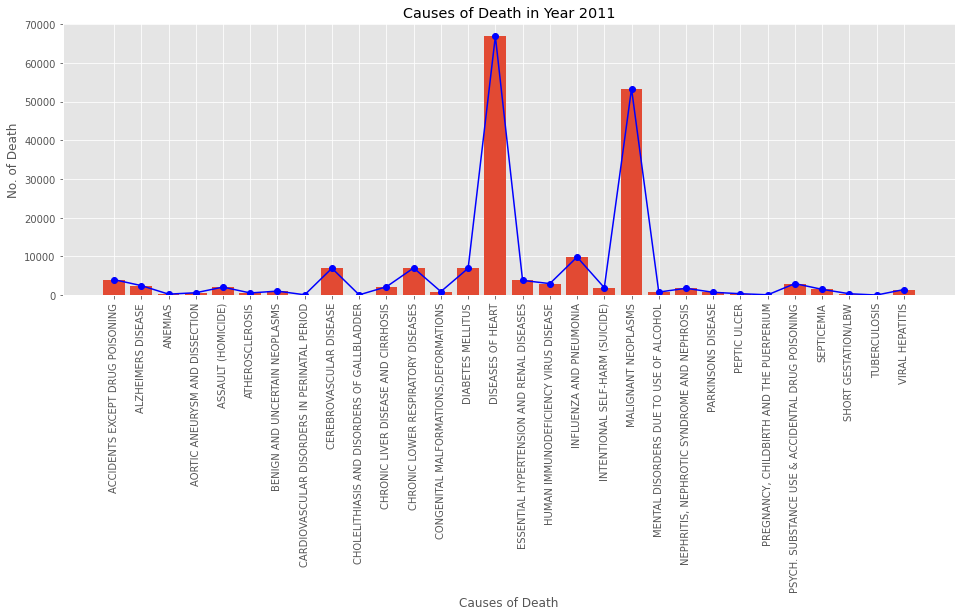

In [22]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
data = df.groupby(['Year','Cause of Death'])['Count'].sum().reset_index()
data = data[data['Year'] == 2011]#.reset_index()
plt.bar(x = data["Cause of Death"],height=data["Count"],)
plt.plot(data["Cause of Death"],data["Count"],"bo-")
plt.title("Causes of Death in Year 2011")
plt.xlabel("Causes of Death")
plt.ylabel("No. of Death")
plt.xticks(rotation = 90)
plt.show()

>  The trend of causes of death looks quite similar throughout the year. Heart Disease remains it's position at the top and malignant neoplasm remains at the second position throughout the year.

> <h4>Overall percentage of death among Male and Female:</h4>

In [23]:
df.groupby(['Sex'])['Count'].sum()/df['Count'].sum()

Sex
FEMALE    0.507816
MALE      0.492184
Name: Count, dtype: float64

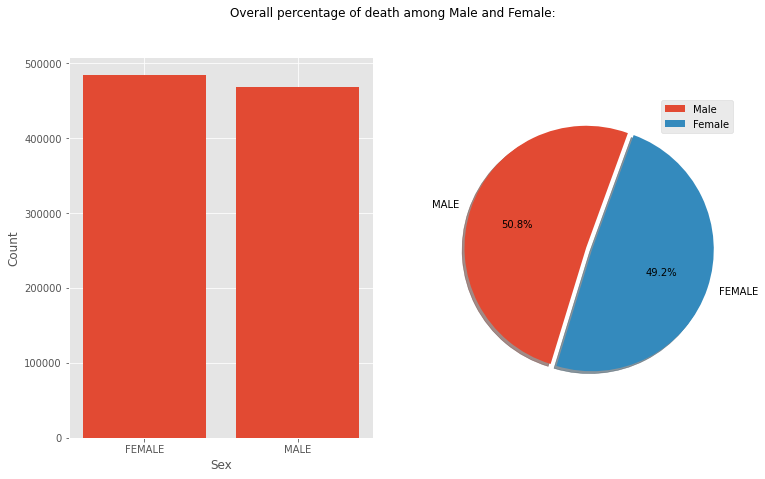

In [24]:
plt.figure(figsize=(12,7))
data = df.groupby(['Sex'])['Count'].sum().reset_index()
plt.subplot(1,2,1)
plt.bar(x = data['Sex'], height = data['Count'])
plt.xlabel("Sex")
plt.ylabel("Count")

plt.subplot(1,2,2)
labels = ["Male","Female"]
df['Sex'].value_counts().plot.pie(y = "Sex",startangle = 70, explode = (0,0.05),shadow = True,autopct = '%0.1f%%')
plt.legend(labels,loc = 'best')
plt.axis('off')
plt.suptitle("Overall percentage of death among Male and Female:")
plt.show()


> <h4>Relation beetween number of death, ethnicity and gender:</h4>

In [25]:
df.groupby(['Ethnicity','Sex'])['Count'].sum()[::-1].reset_index()

,Ethnicity,Sex,Count
0,NON-HISPANIC WHITE,MALE,231936
1,NON-HISPANIC WHITE,FEMALE,251964
2,NON-HISPANIC BLACK,MALE,119484
3,NON-HISPANIC BLACK,FEMALE,130424
4,HISPANIC,MALE,86920
5,HISPANIC,FEMALE,77128
6,ASIAN & PACIFIC ISLANDER,MALE,30784
7,ASIAN & PACIFIC ISLANDER,FEMALE,24508


In [26]:
data = df.groupby(['Ethnicity','Sex'])['Count'].sum()[::-1].reset_index()
fig = px.bar(data_frame = data,x = 'Ethnicity', y= 'Count', color = 'Sex',barmode ='group',
            title = "Number of death with respect to ethnicity and gender")
fig.show()

In [27]:
from plotly.subplots import make_subplots
data = df.groupby(df['Year'])['Count'].sum().reset_index()
fig = make_subplots(rows=1,cols=2)

trace_1 = go.Scatter(x=data['Year'],y=data['Count'],opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Bar(x=data['Year'],y=data['Count'])

fig.add_trace(trace_1,1,1)
fig.add_trace(trace_2,1,2)

fig.update_layout(title_text="Total number of death throughout the year")
fig.show()

- Total number of death caused by leading causes is getting decreased throughout the year. Development in medical science may be one of the major reason for this decreasement.